In [1]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import Image

import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb, gamma
%matplotlib inline

## Visualizando a incerteza para os valores de *q* a partir das amostras

#### Utilizando distribuição binomial para achar *p(q|m)*

In [2]:
def binomial(N,m,q):
    return comb(N,m)*(q**m)*((1-q)**(N-m))

In [3]:
def plot(N,m):
    if m > N:
        m = N

    q = np.linspace(0,1,100)

    vero = binomial(N,m,q)

    _ = plt.plot(q,vero)
    
interactive_plot = interactive(plot, N=(1,400), m=(1,400))
interactive_plot

interactive(children=(IntSlider(value=200, description='N', max=400, min=1), IntSlider(value=200, description=…

#### Utilizando modelos conjugados, sendo *p(m|q)* uma binomial e assumindo que *q* segue uma distribuição beta

In [4]:
def beta(a,b,q):
    return (gamma(a+b)/(gamma(a)*(gamma(b))))*(q**(a-1))*((1-q)**(b-1))

In [8]:
def plot(N,m,a,b):
    q = np.linspace(0,1,100)

# events = [
#     (1,1),
#     (3,1),
#     (4,2),
#     (5,2),
#     (8,2),
#     (10,2),
#     (15,7),
#     (400,200)
# ]

    priori = beta(a,b,q)


    vero = binomial(N,m,q)

    posteriori = priori * vero 

    fig = plt.figure(figsize=(20,3))
    fig.suptitle(f"Jogadas: {N} | caras: {m}", fontsize=20)
    fig.subplots_adjust(top=0.7)


    plt.subplot(1,3,1)
    plt.plot(q, vero, 'r')
    plt.title("Verossimilhança")

    plt.subplot(1,3,2)
    plt.plot(q, priori, 'b')
    plt.title("Priori")

    plt.subplot(1,3,3)
    plt.plot(q, posteriori, 'g')
    plt.title("Posteriori")
        
interactive_plot = interactive(plot, N=(1,400), m=(1,400), a=(1,5), b=(1,5))
interactive_plot

interactive(children=(IntSlider(value=200, description='N', max=400, min=1), IntSlider(value=200, description=…

#### Utilizando modelos conjugados, sendo *p(m|q)* uma binomial e assumindo que *q* segue uma distribuição beta, porém, para cada análise (representando eventos em sequência), utilizo a posteriore do evento K como priori de K+1

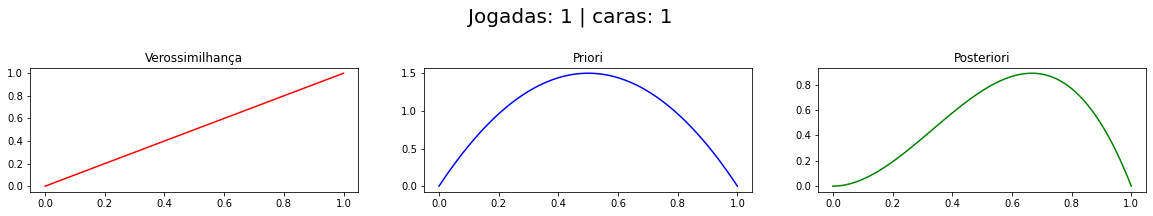

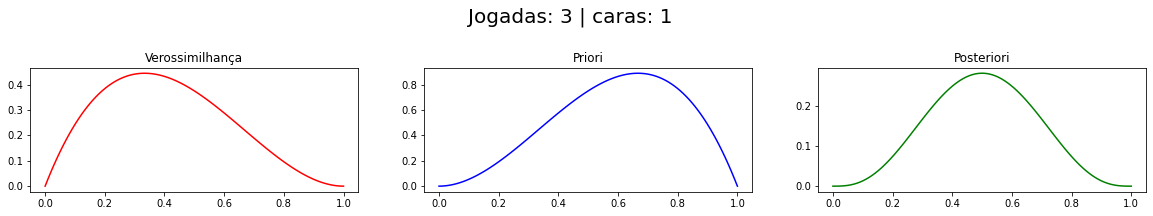

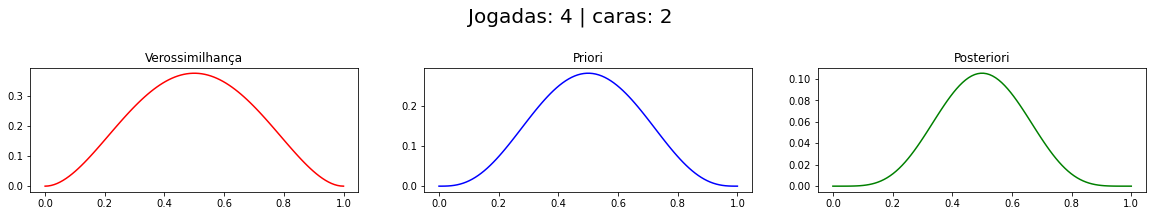

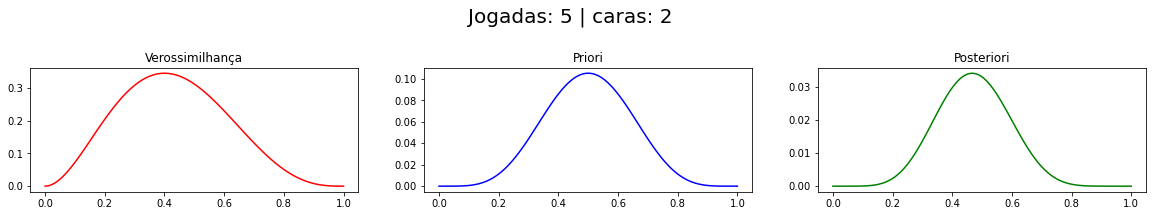

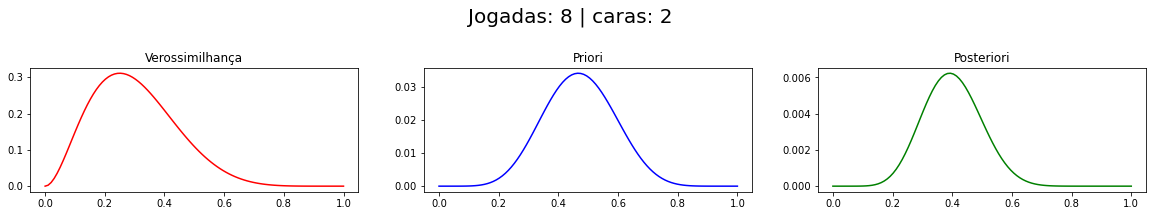

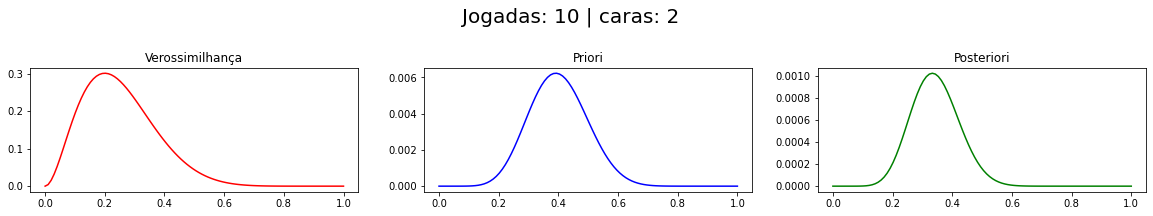

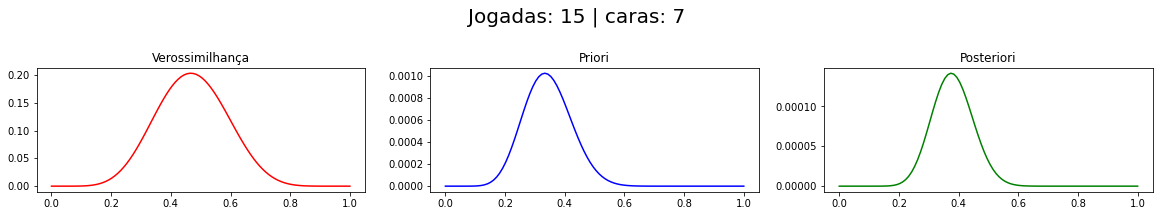

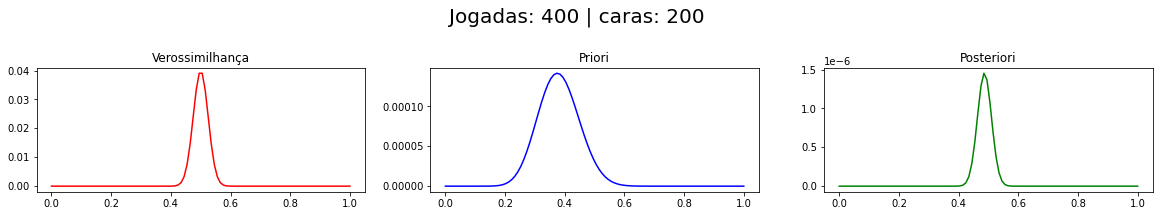

In [6]:
N = 2
m = 1
q = np.linspace(0,1,100)

a = 2
b = 2

events = [
    (1,1),
    (3,1),
    (4,2),
    (5,2),
    (8,2),
    (10,2),
    (15,7),
    (400,200)
]

priori = beta(a,b,q)

for N,m in events:
    vero = binomial(N,m,q)

    posteriori = priori * vero 
    
    fig = plt.figure(figsize=(20,3))
    fig.suptitle(f"Jogadas: {N} | caras: {m}", fontsize=20)
    fig.subplots_adjust(top=0.7)


    plt.subplot(1,3,1)
    plt.plot(q, vero, 'r')
    plt.title("Verossimilhança")

    plt.subplot(1,3,2)
    plt.plot(q, priori, 'b')
    plt.title("Priori")

    plt.subplot(1,3,3)
    plt.plot(q, posteriori, 'g')
    plt.title("Posteriori")
    
    priori = posteriori